In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_LA = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\combine_LA.csv")

In [3]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std

In [4]:
x_la = df_LA[band_name]
y_weighted_la = df_LA['weighted_la']
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_la = np.expand_dims(log_y_weighted_la, axis=1)

In [5]:
def plot_spectrum(X, wl, xLabel, yLabel):
    with plt.style.context('ggplot'):
        plt.plot(wl, X.T)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)

In [7]:
x_la = x_la.to_numpy()
x_la.shape
x_la[:,0:122].shape

(64, 122)

In [8]:
x_la.shape

(64, 244)

In [9]:
wl = np.linspace(396.749576,1002.7995759999999, 122)

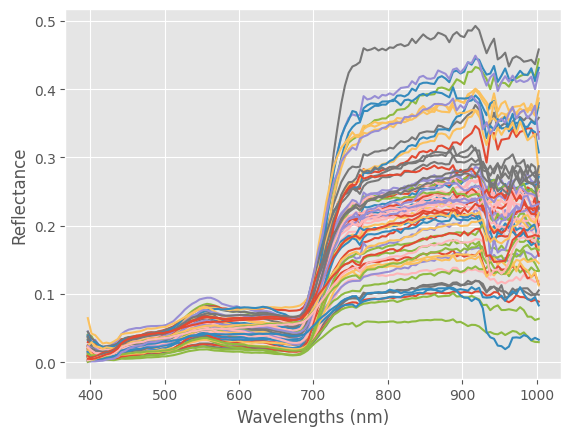

In [10]:
plot_spectrum(x_la[:,0:122], wl, 'Wavelengths (nm)', 'Reflectance')

In [11]:
plot_spectrum(x_la[:,122:244], wl, 'Wavelengths (nm)', 'Reflectance')

In [12]:
#Model
plsModel = PLSRegression(n_components=8)
plsModel.fit(x_la,log_y_weighted_la)
yPred = plsModel.predict(x_la, copy=True)

In [13]:
print(yPred.shape, log_y_weighted_la.shape)

(64, 1) (64, 1)


In [14]:
#Plotting Model Results:
linearmodel = linregress(log_y_weighted_la[:,0], yPred[:,0])
modelY = [linearmodel.slope*x + linearmodel.intercept for x in log_y_weighted_la[:,0]]
# modelY = [linearmodel.slope*x_la + linearmodel.intercept for x in log_y_weighted_la
residuals = modelY-log_y_weighted_la[:,0]

In [15]:
fig,ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].scatter(log_y_weighted_la, yPred, marker="o")
ax[0,0].plot(log_y_weighted_la[:,0], modelY, color="grey", linestyle="-")
ax[0,1].scatter(log_y_weighted_la[:,0], modelY-log_y_weighted_la[:,0])
ax[0,0].set_title("Model")
ax[0,0].set_ylabel("Predicted Y")
ax[0,0].set_xlabel("Observed Y")
ax[0,1].set_title("Residuals")
ax[0,1].set_xlabel("Observed Y")
ax[1,0].plot(log_y_weighted_la[:,0])
ax[1,0].plot(modelY, color="red")
ax[1,0].set_title("Y Run Chart")
ax[1,1].plot(residuals)
text = ax[1,1].set_title("Residuals Run Chart")

In [16]:
plsModel.coef_[:,0].shape

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(244,)

In [18]:
np.abs(plsModel.coef_[:,0])

array([0.25162608, 0.14147376, 0.10455377, 0.2510314 , 0.17585363,
       0.15115389, 0.1674492 , 0.1074488 , 0.14319312, 0.07246476,
       0.00403796, 0.04034035, 0.05513119, 0.01722102, 0.12982689,
       0.01125351, 0.00399006, 0.06951875, 0.01885044, 0.0270344 ,
       0.03236153, 0.046059  , 0.01550978, 0.0127023 , 0.0271413 ,
       0.05458497, 0.00203169, 0.02061793, 0.02359963, 0.01078234,
       0.05179055, 0.05589824, 0.08529699, 0.12977854, 0.12455796,
       0.10224944, 0.10138281, 0.06304411, 0.05608666, 0.02537875,
       0.05416508, 0.00381728, 0.01954053, 0.02443496, 0.01288465,
       0.00610551, 0.01175694, 0.00860118, 0.02346431, 0.04518173,
       0.05631157, 0.059227  , 0.03728724, 0.07687502, 0.07354515,
       0.06098668, 0.04761537, 0.03929717, 0.02998926, 0.05664443,
       0.12716443, 0.19221921, 0.2089121 , 0.18739602, 0.19244671,
       0.11544324, 0.09970279, 0.02601268, 0.00056633, 0.03473948,
       0.06820577, 0.07525299, 0.02034171, 0.02401584, 0.16776

In [29]:
sort_index = np.argsort(np.abs(plsModel.coef_[:,0]))
sort_index[-8:]

array([133,   3,   0, 229, 243, 107, 125, 124], dtype=int64)

In [31]:
optimal_band_name = []
model_coefficience = []
for i in sort_index[-8:]:
    optimal_band_name.append(band_name[i])
    model_coefficience.append(plsModel.coef_[:,0][i])
#     print(i)

In [32]:
optimal_band_name

['b12_std',
 'b4_mean',
 'b1_mean',
 'b108_std',
 'b122_std',
 'b108_mean',
 'b4_std',
 'b3_std']

In [33]:
model_coefficience

[0.24839608807373026,
 0.2510314022329621,
 -0.25162607625180117,
 0.2865569513069457,
 -0.3074071818024589,
 0.31396619530256276,
 -0.3394257254447247,
 -0.3744722702068813]